# Volumetric Behaviour of Pure Fluids from Intermolecular Interactions

## Second order coefficient of the virial expansion from molecular-level information. 

Consider a single component molecular systems interacting via the interatomic potential $\Gamma_{ii}$: 

The second order virial coefficient can be written as a function of the intermolecular potential as: 

$$
B_{ii}=2\pi{N_A}\int_0^\infty(1-\exp(-\Gamma_{ii}/RT))r^2)dr
$$

Let's compute the second virial coefficient for a series of monocomponent gases.

## Two body interaction potential

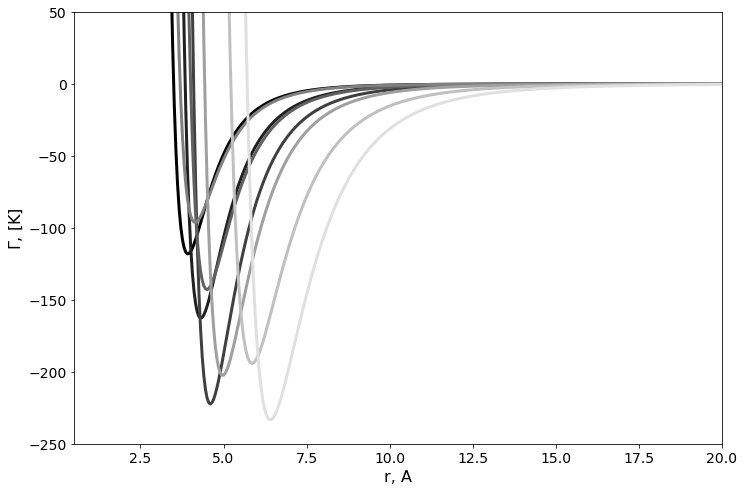

In [1]:
import matplotlib.pyplot as plt 
from matplotlib import cm
import numpy as np

figure=plt.figure()
axes = figure.add_axes([0.1,0.1,1.5,1.5])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.set_xlabel('r, A', fontsize=16);
axes.set_ylabel('$\Gamma$, [K]',fontsize=16);
axes.set_xlim([0.5,20]);
axes.set_ylim([-250,50]);

#Intermolecular Potential, i.e. LJ 6/12
#Species=[Ar, Kr, Xe, CH4, N2, C2H4, C2H6, C3H8]
SIGMA=[3.499, 3.846, 4.100, 4.010, 3.694, 4.433, 5.220, 5.711] # Angstrom
EPS=[118.13, 162.74, 222.32, 142.87, 96.26, 202.52, 194.14, 233.28] #K 
a=[0.121, 0.144, 0.173, 0.283, 0.250, 0.249, 0.359, 0.470] #Note: C2H4 is not in Table 5.3 of Prausnitz

r = np.linspace(0.3, 25, 500)
Gamma=np.zeros((np.size(r),np.size(SIGMA)))
Gamma_2=np.zeros((np.size(r),np.size(SIGMA)))

color=iter(cm.gist_gray(np.linspace(0,1,np.size(SIGMA)+1)))
color_2=iter(cm.gist_heat(np.linspace(0,1,np.size(SIGMA)+1)))

# Consider a LJ gas
for i in np.arange(0,np.size(SIGMA)):
    c=next(color)
    sr6=np.power(np.divide(SIGMA[i],r),6)
    Gamma[:,i]=4*EPS[i]*(np.power(sr6,2)-sr6)
    axes.plot(r,Gamma[:,i], marker=' ' , c=c, linewidth=3.0);

## Consider a Kihara gas
#for i in np.arange(0,np.size(SIGMA)):
##    c_2=next(color_2)
#    sr6_2=np.power(np.divide(SIGMA[i]-2*a[i],r-2*a[i]),6)
#    Gamma_2[:,i]=4*EPS[i]*(np.power(sr6_2,2)-sr6_2)
#    axes.plot(r,Gamma_2[:,i], marker=' ' , c=c_2, linewidth=3.0);

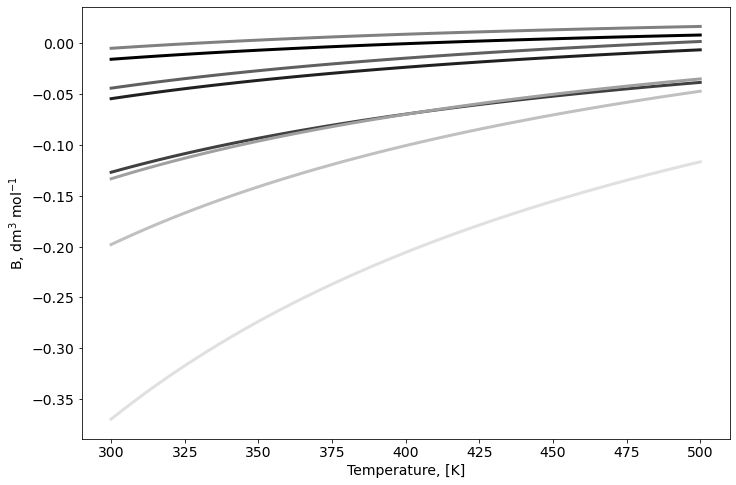

In [2]:
# Compute the second Virial coefficient as a function of T
Temperature = np.linspace(300, 500, 50)
figure=plt.figure()
axes = figure.add_axes([0.1,0.1,1.5,1.5])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

axes.set_xlabel('Temperature, [K]', fontsize=14);
axes.set_ylabel('B, dm$^3$ mol$^{-1}$',fontsize=14);

B=np.zeros((np.size(Temperature),np.size(SIGMA)))
B_2=np.zeros((np.size(Temperature),np.size(SIGMA)))

color=iter(cm.gist_gray(np.linspace(0,1,np.size(SIGMA)+1)))
color_2=iter(cm.gist_heat(np.linspace(0,1,np.size(SIGMA)+1)))

# Consider a LJ gas
for i in np.arange(0,np.size(SIGMA)):
    c=next(color)
    for j in np.arange(0,np.size(Temperature)):
        B[j,i]=2*np.pi*6E23*np.trapz((1-np.exp(-Gamma[:,i]/Temperature[j]))*np.power(r*1E-9,2),r*1E-9)
    axes.plot(Temperature,B[:,i], marker=' ' , c=c, linewidth=3.0);

# Consider a Kihara gas    
#for i in np.arange(0,np.size(SIGMA)):
#    c_2=next(color_2)
#    for j in np.arange(0,np.size(Temperature)):
#        B_2[j,i]=2*np.pi*6E23*np.trapz((1-np.exp(-Gamma_2[:,i]/Temperature[j]))*np.power(r*1E-9,2),r*1E-9)
#    axes.plot(Temperature,B_2[:,i], marker=' ' , c=c_2, linewidth=3.0);

## Properties

In [6]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
###
##Choose Chemical Specie:
#Species=[Ar, Kr, Xe, CH4, N2, C2H4, C2H6, C3H8]
Chem_Sp=3
# Note: I attach as an example Ar since it is important to note that Michels' 
# highly accurate second-virial-coefficient data for Ar can not be represented 
# over a large temperature range by the LJ potential using only one set of potential
# parameters. However, these same data can be represented within the very small
# experimental error by the Kihara potential using only one set of parameters.
# For a further discussion on this refer to Praustnitz recommented textbook.
###

### Compressibility factor

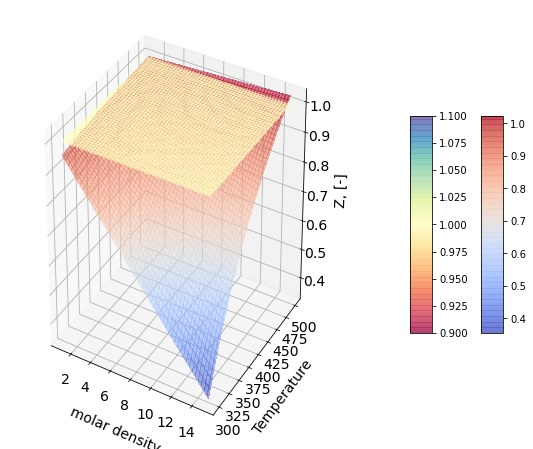

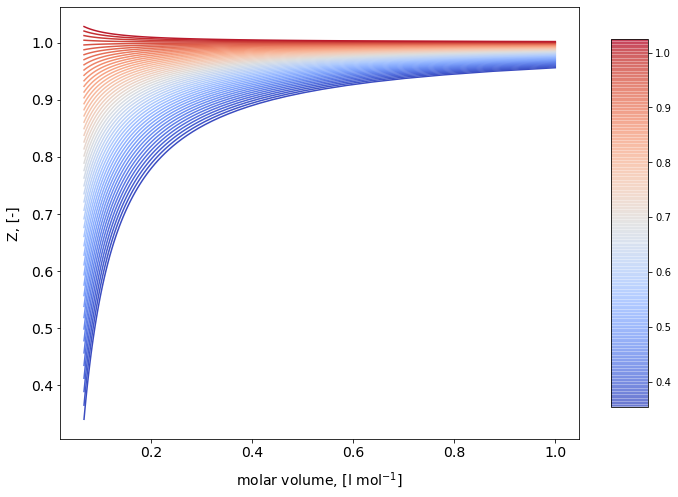

In [7]:
## Z Diagram
rho=np.linspace(1, 15, 100) # mol / l

rho_g, Temperature_g = np.meshgrid(rho, Temperature) 

Z=np.zeros((np.shape(rho_g)))
Z_2=np.zeros((np.shape(rho_g)))

# For a LJ gas
for i in np.arange(0,np.size(rho)):
    Z[:,i]=1+rho_g[:,i]*B[:,Chem_Sp]

# For a Kihara gas
for i in np.arange(0,np.size(rho)):
    Z_2[:,i]=1+rho_g[:,i]*B_2[:,Chem_Sp]


figure=plt.figure(figsize=(10, 8))
axes = figure.gca(projection ='3d')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# For a LJ gas
surf=axes.plot_surface(rho_g,Temperature_g,Z,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,alpha=0.5)

# For a Kihara gas
surf_2=axes.plot_surface(rho_g,Temperature_g,Z_2,cmap=cm.Spectral,
                        linewidth=0, antialiased=False,alpha=0.5)

axes.set_xlabel('molar density', fontsize=14, labelpad=10);
axes.set_ylabel('Temperature',fontsize=14, labelpad=10);
axes.set_zlabel('Z, [-]',fontsize=14, labelpad=10);
for t in axes.zaxis.get_major_ticks(): t.label.set_fontsize(14)
figure.colorbar(surf, shrink=0.5, aspect=10, pad=0);
figure.colorbar(surf_2, shrink=0.5, aspect=10, pad=0.15);

figure=plt.figure()
axes = figure.add_axes([0.1,0.1,1.5,1.5])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.set_xlabel('molar volume, [l mol$^{-1}$]', fontsize=14, labelpad=10);
axes.set_ylabel('Z, [-]',fontsize=14,labelpad=10);

color=iter(cm.coolwarm(np.linspace(0,1,np.size(Temperature)+1)))
color_2=iter(cm.Spectral(np.linspace(0,1,np.size(Temperature)+1)))

# For a LJ gas
for i in np.arange(0,np.size(Temperature)):
        c=next(color)
        axes.plot(1/rho,Z[i,:], marker=' ' , c=c);
figure.colorbar(surf, shrink=0.85, aspect=10);

# For a Kihara gas
#for i in np.arange(0,np.size(Temperature)):
#        c_2=next(color_2)
#        axes.plot(1/rho,Z_2[i,:], marker=' ' , c=c_2);
#figure.colorbar(surf_2, shrink=0.85, aspect=10);

### P/v isotherms Diagram

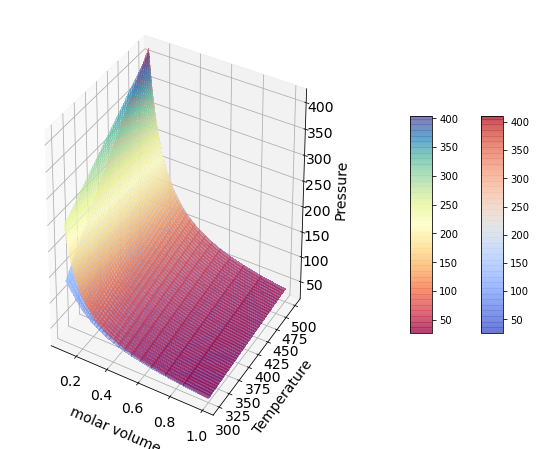

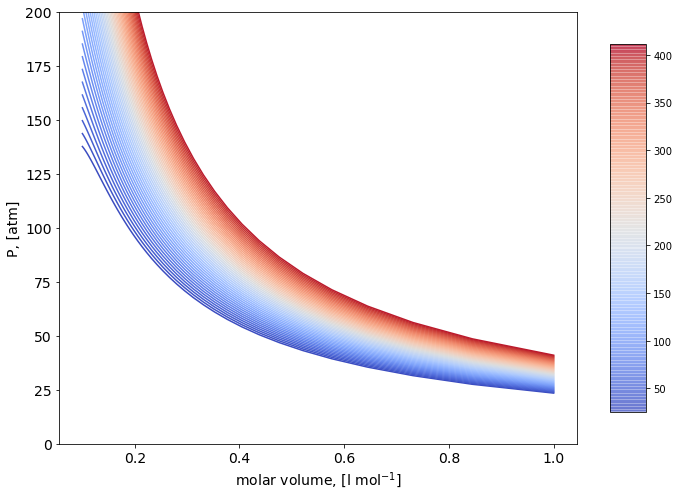

In [8]:
rho=np.linspace(1, 10, 50) # mol / l

rho_g, Temperature_g = np.meshgrid(rho, Temperature)

P=np.zeros((np.shape(rho_g)))
P_2=np.zeros((np.shape(rho_g)))

R=0.082;

# For a LJ gas
for i in np.arange(0,np.size(rho)):
    P[:,i]=Temperature_g[:,i]*R*rho_g[:,i]+Temperature_g[:,i]*R*rho_g[:,i]*rho_g[:,i]*B[:,Chem_Sp]

# For a Kihara gas
for i in np.arange(0,np.size(rho)):
    P_2[:,i]=Temperature_g[:,i]*R*rho_g[:,i]+Temperature_g[:,i]*R*rho_g[:,i]*rho_g[:,i]*B_2[:,Chem_Sp]

figure=plt.figure(figsize=(10, 8))
#axes = figure.add_axes([0.1,0.1,0.1,1.2,1.2,1.2])
axes = figure.gca(projection ='3d') 

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# For a LJ gas
surf=axes.plot_surface(1/rho_g,Temperature_g,P,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,alpha=0.5)

# For a Kihara gas
surf_2=axes.plot_surface(1/rho_g,Temperature_g,P_2,cmap=cm.Spectral,
                       linewidth=0, antialiased=False,alpha=0.5)

axes.set_xlabel('molar volume', fontsize=14, labelpad=10);
axes.set_ylabel('Temperature',fontsize=14, labelpad=10);
axes.set_zlabel('Pressure',fontsize=14, labelpad=10);
for t in axes.zaxis.get_major_ticks(): t.label.set_fontsize(14)
figure.colorbar(surf, shrink=0.5, aspect=10, pad = 0);
figure.colorbar(surf_2, shrink=0.5, aspect=10, pad=0.15);

figure=plt.figure()
axes = figure.add_axes([0.1,0.1,1.5,1.5])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.set_xlabel('molar volume, [l mol$^{-1}$]', fontsize=14);
axes.set_ylabel('P, [atm]',fontsize=14);

color=iter(cm.coolwarm(np.linspace(0,1,np.size(Temperature)+1)))
#color_2=iter(cm.Spectral(np.linspace(0,1,np.size(Temperature)+1)))

# For a LJ gas
for i in np.arange(0,np.size(Temperature)):
        c=next(color)
        axes.plot(1/rho,P[i,:], marker=' ' , c=c);

# For a Kihara gas
#for i in np.arange(0,np.size(Temperature)):
#        c_2=next(color_2)
#        axes.plot(1/rho,P_2[i,:], marker=' ' , c=c_2);

axes.set_ylim([0,200]);
figure.colorbar(surf, shrink=0.85, aspect=10);
#figure.colorbar(surf_2, shrink=0.85, aspect=10);